# **Organización de datos**

In [ ]:
# Importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib muestra los resultados en la Notebook de Jupyter
%matplotlib inline

In [111]:
# Tomar datos del url en formato "raw"
url = 'https://raw.githubusercontent.com/eduardxmartinez/FisicaComputacional/master/Actividad1/2030.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_tkt = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_tkt0 = df_tkt.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_tkt1 = df_tkt0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_tkt1[cols] = pd.to_numeric(df_tkt0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_tkt2 = df_tkt1.copy()
df_tkt2['Fecha'].head()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_tkt2['Fecha'] = pd.to_datetime(df_tkt2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_tkt2['Año'] = df_tkt2['Fecha'].dt.year
df_tkt2['Mes'] = df_tkt2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_meteotkt = df_tkt2.copy()
df_meteotkt.info()
print(df_meteotkt.head())
print(df_meteotkt.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23084 non-null  datetime64[ns]
 1   Precip  23024 non-null  float64       
 2   Evap    4447 non-null   float64       
 3   Tmax    22382 non-null  float64       
 4   Tmin    22384 non-null  float64       
 5   Año     23084 non-null  int64         
 6   Mes     23084 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1946-01-01     0.0   NaN   NaN   NaN  1946    1
1 1946-01-02    21.0   NaN  18.4   NaN  1946    1
2 1946-01-03     0.0   NaN   NaN   NaN  1946    1
3 1946-01-04     9.5   NaN  11.1   1.1  1946    1
4 1946-01-05     0.0   NaN  15.0   4.4  1946    1
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
23079 2012-10-27     0.0   NaN  33.0   6.0  2012   10
23080 2012-10-28   

In [112]:
# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_meteotkt.drop('Mes', axis=1, inplace=True)
df_meteotkt['Mes'] = df_meteotkt['Fecha'].dt.strftime('%b')
df_meteotkt.info()
print(df_meteotkt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23084 non-null  datetime64[ns]
 1   Precip  23024 non-null  float64       
 2   Evap    4447 non-null   float64       
 3   Tmax    22382 non-null  float64       
 4   Tmin    22384 non-null  float64       
 5   Año     23084 non-null  int64         
 6   Mes     23084 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1946-01-01     0.0   NaN   NaN   NaN  1946  Jan
1 1946-01-02    21.0   NaN  18.4   NaN  1946  Jan
2 1946-01-03     0.0   NaN   NaN   NaN  1946  Jan
3 1946-01-04     9.5   NaN  11.1   1.1  1946  Jan
4 1946-01-05     0.0   NaN  15.0   4.4  1946  Jan


# **Actividad 1.** Análisis Exploratorio de Datos
Se sintetizan las principales características del conjunto de datos


In [113]:
# Forma y dimensiones del DataFrame
print(df_meteotkt.shape)

# Tipo de datos de las columnas
print(df_meteotkt.dtypes)

# Despliegue de renglones para visualizar la estructura del DataFrame
print(df_meteotkt.head())
print(df_meteotkt.tail())
print(df_meteotkt.sample(5))

# Información general de la estructura y componentes del DataFrame
print(df_meteotkt.info()) 

# Descripción estádistica de las variables numéricas
print(df_meteotkt.describe())

# Descripción estádistica de las variables categóricas
#df_meteotkt.describe(include='object')

# Suma de valores faltantes
df_meteotkt.isnull().sum()

(23084, 7)
Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Año                int64
Mes               object
dtype: object
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1946-01-01     0.0   NaN   NaN   NaN  1946  Jan
1 1946-01-02    21.0   NaN  18.4   NaN  1946  Jan
2 1946-01-03     0.0   NaN   NaN   NaN  1946  Jan
3 1946-01-04     9.5   NaN  11.1   1.1  1946  Jan
4 1946-01-05     0.0   NaN  15.0   4.4  1946  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
23079 2012-10-27     0.0   NaN  33.0   6.0  2012  Oct
23080 2012-10-28     0.0   NaN  34.0   8.0  2012  Oct
23081 2012-10-29     0.0   NaN  31.0   9.0  2012  Oct
23082 2012-10-30     0.0   NaN  31.0   9.0  2012  Oct
23083 2012-10-31     0.0   NaN  27.0   9.0  2012  Oct
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
15889 1993-01-09     5.5   NaN  13.0   8.0  1993  Jan
8306  1970-11-05     0.0   3.8  23.0   4.5  1970  Nov
19054 2001-09-

Fecha         0
Precip       60
Evap      18637
Tmax        702
Tmin        700
Año           0
Mes           0
dtype: int64

# **Actividad 2.** Histograma y función de densidad 
Se crean histogramas para las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima y se complementan funciones de densidad. Utilizamos las funciones sns.histplot() y sns.kdeplot() .

## **Precipitación**

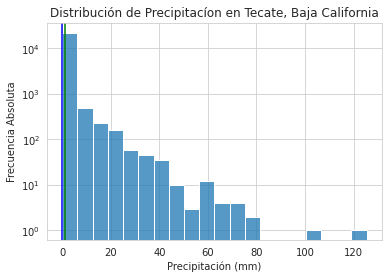

In [114]:
# Elaboracíon de histograma de Precipitación con biblioteca Seaborn
sns.set_style("whitegrid")
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitacíon en Tecate, Baja California')

sns.histplot(data=df_meteotkt, x='Precip', bins=20, log_scale=(False,True));

# Definimos las cantidades: Promedio y Mediana
Pmed  = df_meteotkt.Precip.median()
Pprom = df_meteotkt.Precip.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Pmed, color = 'b');
plt.axvline(Pprom, color = 'g');

plt.show()

## **Evaporación**

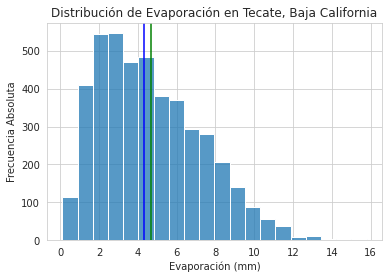

In [115]:
# Elaboracíon de histograma de Evaporación con biblioteca Seaborn
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Evap', bins=20);

# Definimos las cantidades: Promedio y Mediana
Emed  = df_meteotkt.Evap.median()
Eprom = df_meteotkt.Evap.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Emed, color = 'b');
plt.axvline(Eprom, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Evaporación en Tecate, Baja California')

plt.show()

## **Temperatura Máxima**

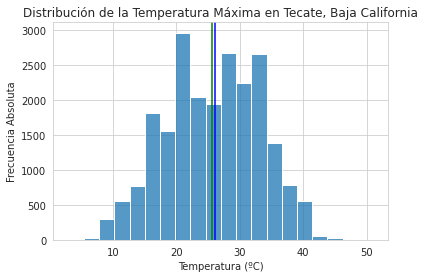

In [116]:
# Elaboracíon de histograma de la Temperatura Máxima con biblioteca Seaborn
sns.set_style("whitegrid")
sns.histplot(data=df_meteotkt, x='Tmax', bins=20);

# Definimos las cantidades: Promedio y Mediana
Tmedx  = df_meteotkt.Tmax.median()
Tpromx = df_meteotkt.Tmax.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Tecate, Baja California')

plt.show()

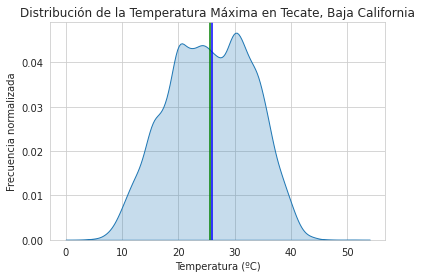

In [117]:
# Gráfica de la función de densidad de probabilidad
sns.set_style('whitegrid')
sns.kdeplot(df_meteotkt.Tmax, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Máxima en Tecate, Baja California')

plt.show()

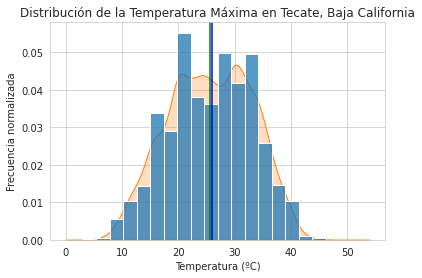

In [118]:
# Sobrepones ambas gráficas
sns.set_style("whitegrid")
sns.histplot(data=df_meteotkt, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteotkt.Tmax, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Máxima en Tecate, Baja California')

plt.show()

## **Temperatura Mínima**

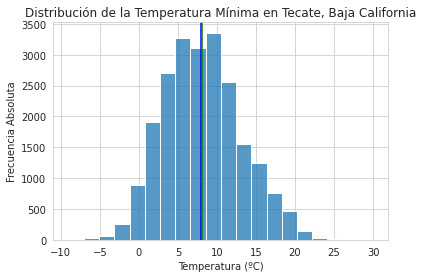

In [119]:
# Elaboracíon de histograma de la Temperatura Mínima con biblioteca Seaborn
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Tmin', bins=20);

# Definimos las cantidades: Promedio y Mediana
Tmedn  = df_meteotkt.Tmin.median()
Tpromn = df_meteotkt.Tmin.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Tecate, Baja California')

plt.show()

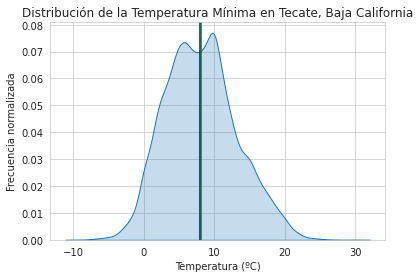

In [120]:
# Gráfica de la función de densidad de probabilidad
sns.set_style('whitegrid')

sns.kdeplot(df_meteotkt.Tmin, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Mínima en Tecate, Baja California')

plt.show()

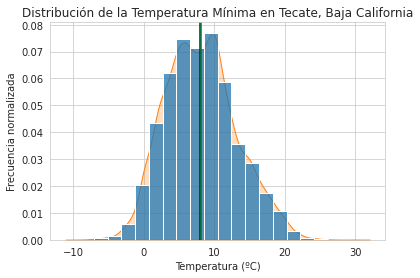

In [121]:
# Sobrepones ambas gráficas
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteotkt.Tmin, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Mínima en Tecate, Baja California')

plt.show()

# **Actividad 3.** Gráficas de caja
Se crean gráficas de cajas para la Evaporación, Temperaturas Máxima y Mínima con la función sns.boxplot().

## **Evaporación**

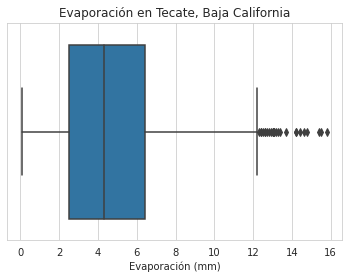

In [125]:
# Gráfica de caja para Evaporación utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Evap, data=df_meteotkt, orient='h').set(
    xlabel='Evaporación (mm)', title= 'Evaporación en Tecate, Baja California');

## Temperatura Máxima

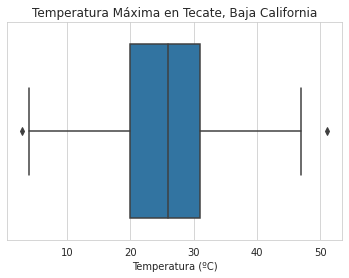

In [126]:
# Gráfica de caja para Temperatura Máxima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Tmax, data=df_meteotkt, orient='h').set(
    xlabel='Temperatura (ºC)', title= 'Temperatura Máxima en Tecate, Baja California');

## Temperatura Mínima

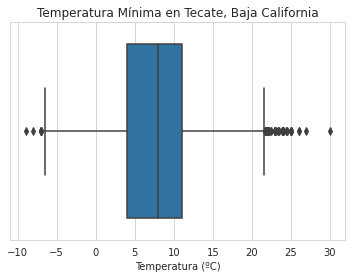

In [127]:
# Gráfica de caja para Temperatura Mínima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Tmin, data=df_meteotkt, orient='h').set(
    xlabel='Temperatura (ºC)', title= 'Temperatura Mínima en Tecate, Baja California');

#**Actividad 4.** Gráficas de Barras
Se producen gráficas de barras para la Precipitación primero por Año y luego por Mes de un seleccionado rango de 30 años con ayuda de la función sns.barplot().

In [128]:
# Seleccionamos un conjunto de años de 30 años
df_p30 = df_meteotkt[(df_meteotkt['Año'] >= 1942) & (df_meteotkt['Año'] < 1972)]
df_u30 = df_meteotkt[(df_meteotkt['Año'] >= 1982) & (df_meteotkt['Año'] < 2012)]

## Precipitación Promedio por Año

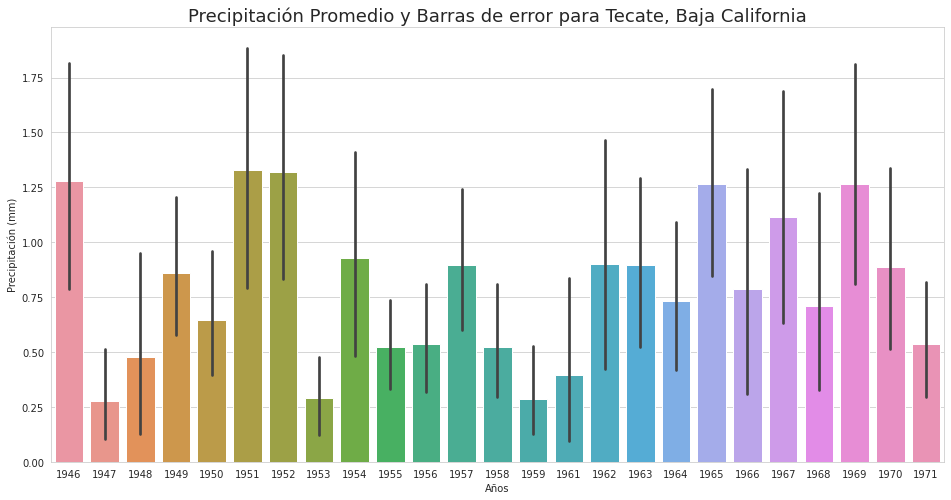

In [129]:
# Gráfica de Precipitación agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.barplot(x='Año', y='Precip', data=df_p30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y Barras de error para Tecate, Baja California', fontsize=18)

plt.show()

## Precipitación Promedio por Mes

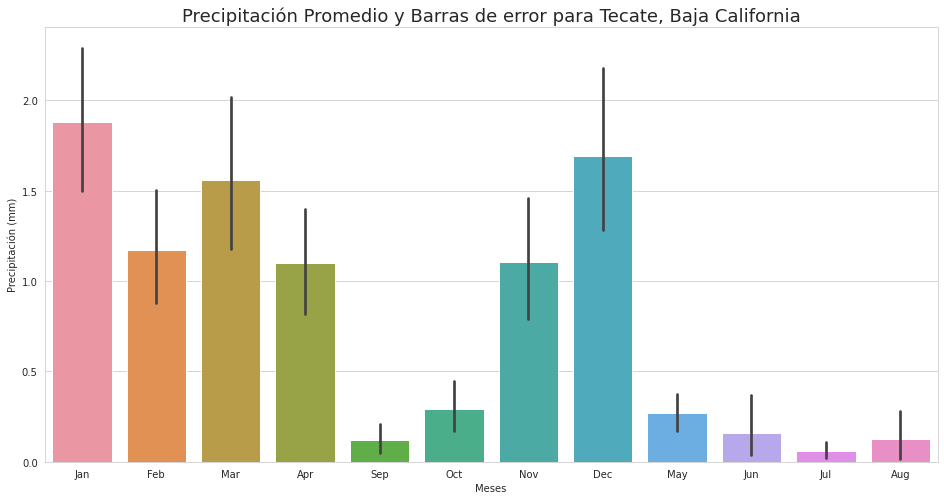

In [130]:
# Gráfica de Precipitación agrupada por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.barplot(x='Mes', y='Precip', data=df_p30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y Barras de error para Tecate, Baja California', fontsize=18)

plt.show()

#**Actividad 5.** Gráficas de línea
Se crean gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo, con ayuda de la función sns.lineplot(), utilizando la colección de datos de los últimos 30 años.

## **Precipitación Promedio por Año**

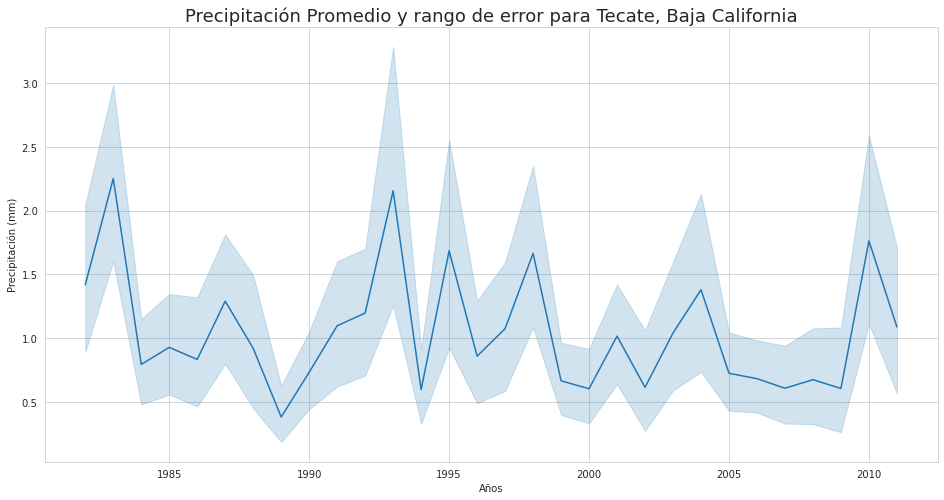

In [131]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Precip', data=df_u30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Tecate, Baja California', fontsize=18)

plt.show()

## **Temperatura Máxima y Mínima Promedia por Año**

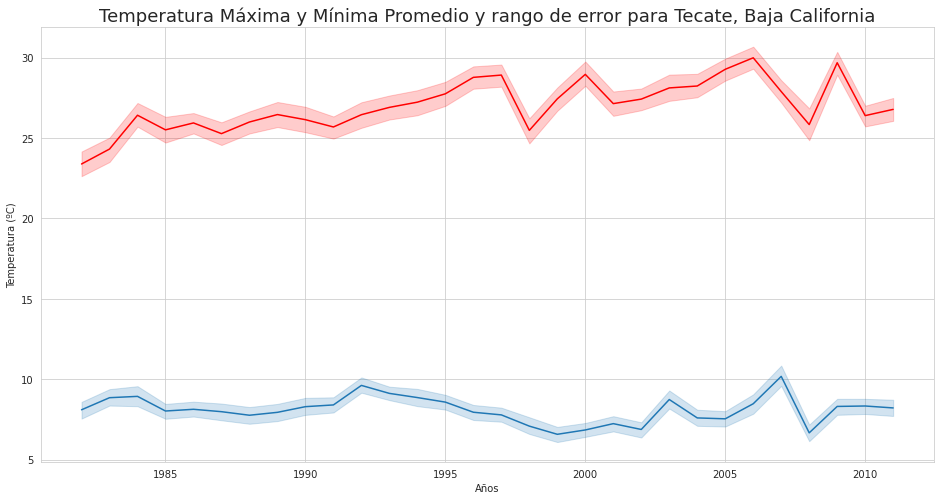

In [132]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_u30, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_u30);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura Máxima y Mínima Promedio y rango de error para Tecate, Baja California', fontsize=18)

plt.show()

#**Actividad 6**. Diagramas de cajas

Se usa el conjunto de los últimos 30 años para producir diagramas de cajas de y observar la variabilidad de las Temperaturas y Evaporación por mes, usamos la función sns.boxplot() . 

## **Temperatura Máxima en los últimos 30 años**

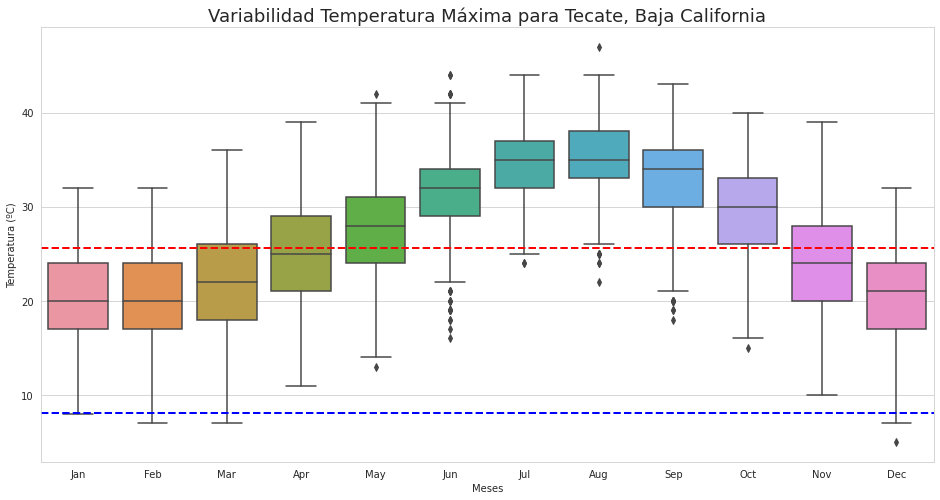

In [133]:
# Gráfica de Temperatura Máxima en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_m=df_meteotkt.Tmax.mean()
Tmin_m=df_meteotkt.Tmin.mean()

# Gráfica de cajas
sns.boxplot(x='Mes', y='Tmax', data=df_u30)

# Líneas de la Temperatura promedio
plt.axhline(Tmax_m, color='r', linestyle='--', linewidth=2);
plt.axhline(Tmin_m, color='b', linestyle='--', linewidth=2);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad Temperatura Máxima para Tecate, Baja California', fontsize=18)

plt.show()

## **Temperatura Mínima en los últimos 30 años**

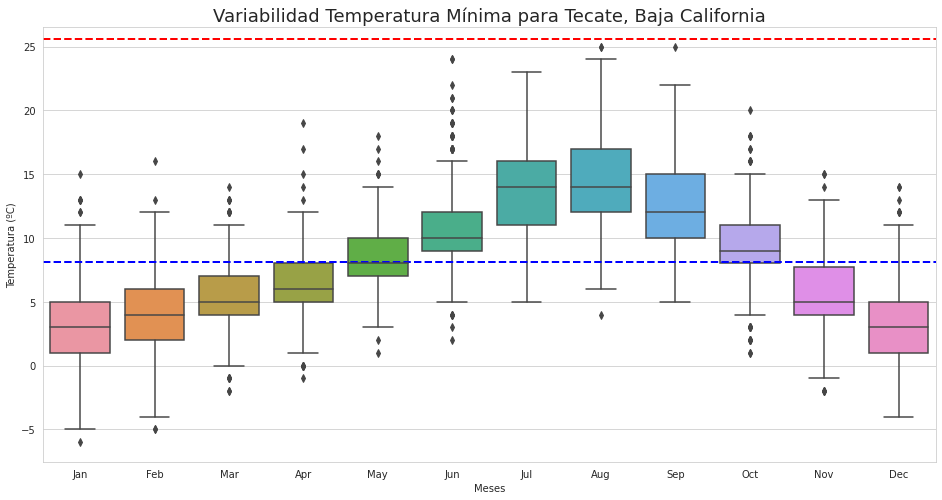

In [134]:
# Gráfica de Temperatura Mínima en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Gráfica de cajas
sns.boxplot(x='Mes', y='Tmin', data=df_u30)

# Líneas de la Temperatura promedio
plt.axhline(Tmax_m, color='r', linestyle='--', linewidth=2);
plt.axhline(Tmin_m, color='b', linestyle='--', linewidth=2);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad Temperatura Mínima para Tecate, Baja California', fontsize=18)

plt.show()